# Abalone Case Study
## Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

### Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

<b> Imported Libraries</b>

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Collected Data from the given link & shows top 5 Records.

In [3]:
data.shape

(4177, 9)

the given data has 4177 records & 9 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<b>From the above information we get to know that there Sex column is categorical, The Rings i.e our label is of integer type and all other columns are of decimal types. and there are no null values in the dataset</b>

In [5]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<b>Sex column is categorical  that tells the shell is M, F, and I (infant)

Length column is  continuous variable it is in mm & Longest shell measurement.

Diameter column is continuous variable  it is in mm & perpendicular to length

Height column is continuous variable  it is in mm & with meat in shell

Whole weight column is continuous variable  it is in grams &  whole abalone

Shucked weight column is continuous variable  it is in grams & weight of meat

Viscera weight column is continuous variable  it is in grams & gut weight (after bleeding)

Shell weight column is continuous variable  it is in grams & after being dried

Rings column is integer type variable  & +1.5 gives the age in years. </b>

In [6]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

there are no null values in any column

## EDA

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


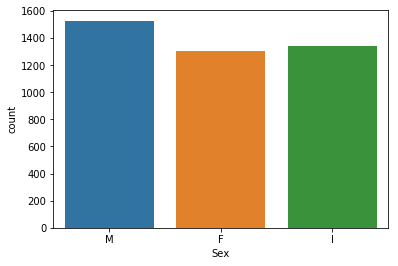

In [7]:
print(data['Sex'].value_counts())
sns.countplot(x="Sex",data=data)
plt.show()

from the above graph we noticed that there are 1528 records of male,1342 records of infant & female consists 1307 records.

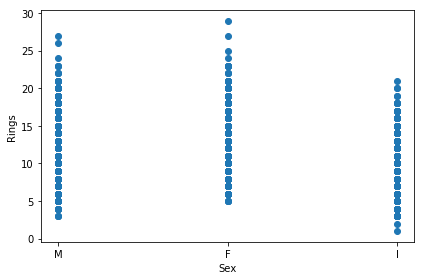

In [8]:
plt.scatter(data['Sex'],data['Rings'])
plt.xlabel('Sex')
plt.ylabel("Rings")
plt.tight_layout()

from the above graph we conclude that-----:

the male shell is continous with the range of 3 to 25 & there are two more records of rings 26 & 27 that seems to be like outliers.

the female shell is continous with range of 5 to 25 rings & two more records of rings 27 & 29 that seems to be like outliers.

th infant shell is continous with the range from 1 to 20 rings.

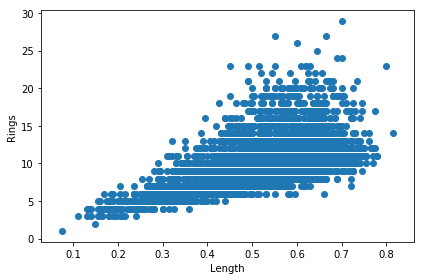

In [9]:
plt.scatter(data['Length'],data["Rings"])
plt.xlabel('Length')
plt.ylabel("Rings")
plt.tight_layout()

from the above graph it seems to be like the length of range 0.1mm to 0.78mm is normally distributed & there are some outliers too.

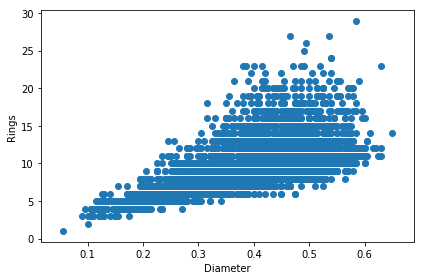

In [10]:
plt.scatter(data['Diameter'],data["Rings"])
plt.xlabel('Diameter')
plt.ylabel("Rings")
plt.tight_layout()

from the above graph it seems to be like the diameter of range 0.1mm to 0.6mm is normally distributed & there are some outliers too.

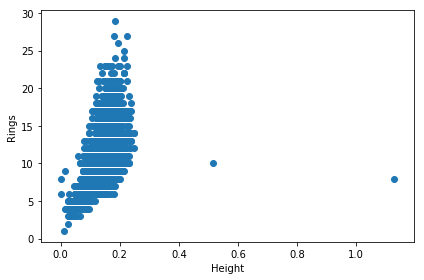

In [11]:
plt.scatter(data['Height'],data["Rings"])
plt.xlabel('Height')
plt.ylabel("Rings")
plt.tight_layout()

from the above graph it seems to be like the height of range 0.0mm to 0.22mm is normally distributed & there are some outliers too.

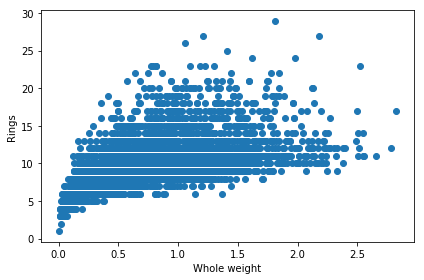

In [12]:
plt.scatter(data['Whole weight'],data["Rings"])
plt.xlabel('Whole weight')
plt.ylabel("Rings")
plt.tight_layout()

from the above graph it seems to be like the whole weight of shell  of range 0 g to 2.4g is normally distributed & there are some outliers too.

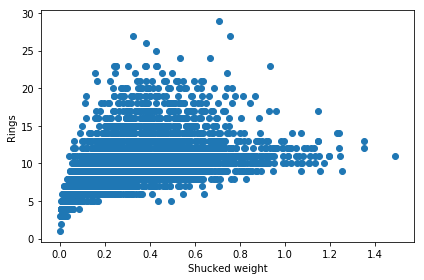

In [13]:
plt.scatter(data['Shucked weight'],data["Rings"])
plt.xlabel('Shucked weight')
plt.ylabel("Rings")
plt.tight_layout()

from the above graph it seems to be like the shucked weight of shell  of range 0 g to 1.21g is normally distributed & there are some outliers too.

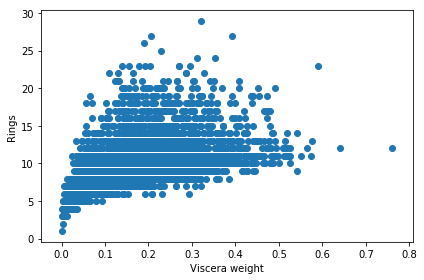

In [14]:
plt.scatter(data['Viscera weight'],data["Rings"])
plt.xlabel('Viscera weight')
plt.ylabel("Rings")
plt.tight_layout()

from the above graph it seems to be like the viscera weight of shell  of range 0 g to 0.5g is normally distributed & there are some outliers too.

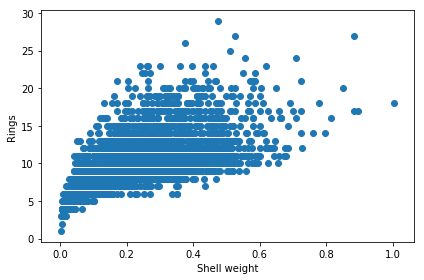

In [15]:
plt.scatter(data['Shell weight'],data["Rings"])
plt.xlabel('Shell weight')
plt.ylabel("Rings")
plt.tight_layout()

In [16]:
data['Sex']=data['Sex'].replace({'M':0,'F':1,'I':2})
data['Sex'].unique()

array([0, 1, 2], dtype=int64)

###### Here i am replacing the values of Sex column i.e. M with 0, F with 1 & I with 2. For  further analysis.

from the above graph it seems to be like the shell weight of shell  of range 0 g to 0.65g is normally distributed & there are some outliers too.

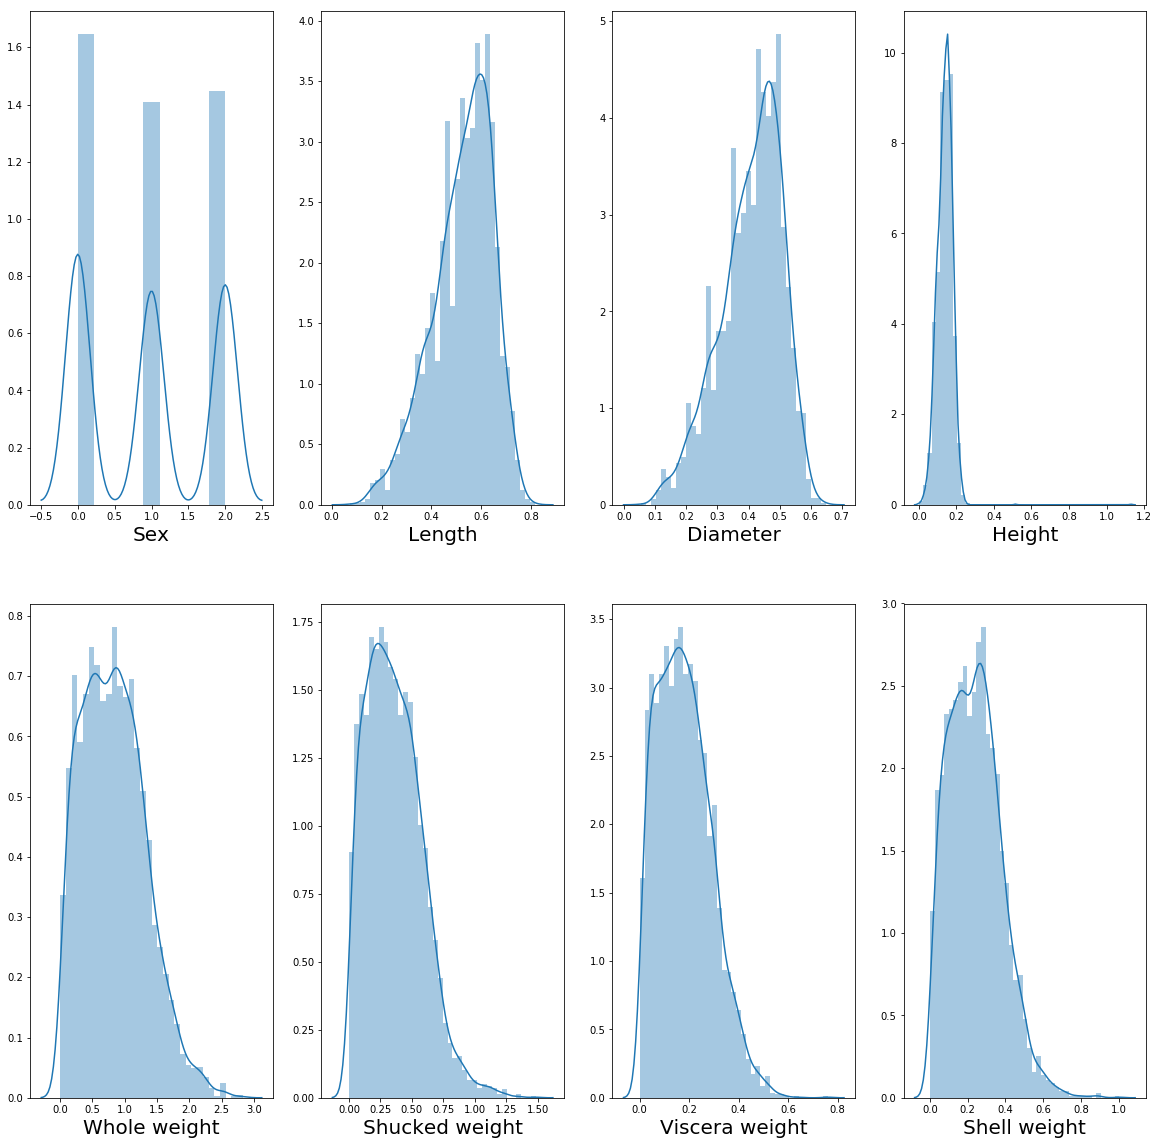

In [17]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=8:
        ax=plt.subplot(2,4,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

from the above graph:

    Graph1:
    
        In this the Sex column that is categorical column is seems to be symmetric.
        
    Graph2:
    
        In this the Length column i.e. continous column is not normally distributed.
        
    Graph3:
    
        In this the Diameter column the data is not normally distributed.
        
    Graph4:
    
        In this the Height column the data is highly skewed.
        
    Graph5:
    
        In this the Whole weight column is not normallly distributed.
        
    Graph6:
    
        In this column i.e. Shucked weight is not Normally Distributed.
        
    Graph7:
    
        In this column i.e. Viscera weight is not nrmally Distribued.
        
    Graph8:
    
        In this column i.e. Shell weight is not normally distributed

In [18]:
data.skew()

Sex               0.083056
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

The  column is in range of -0.5 to 0.5 is Sex only,

The column that are -1 and -0.5 or between 0.5 and 1 are Length,Diameter,Whole weight,Shucked weight, Viscera Weight & 
shell weight that has moderated skewness.

The column that is greter than 1 or less than -1 that are Height which id highly skewed.

## Checking for Outliers in the data

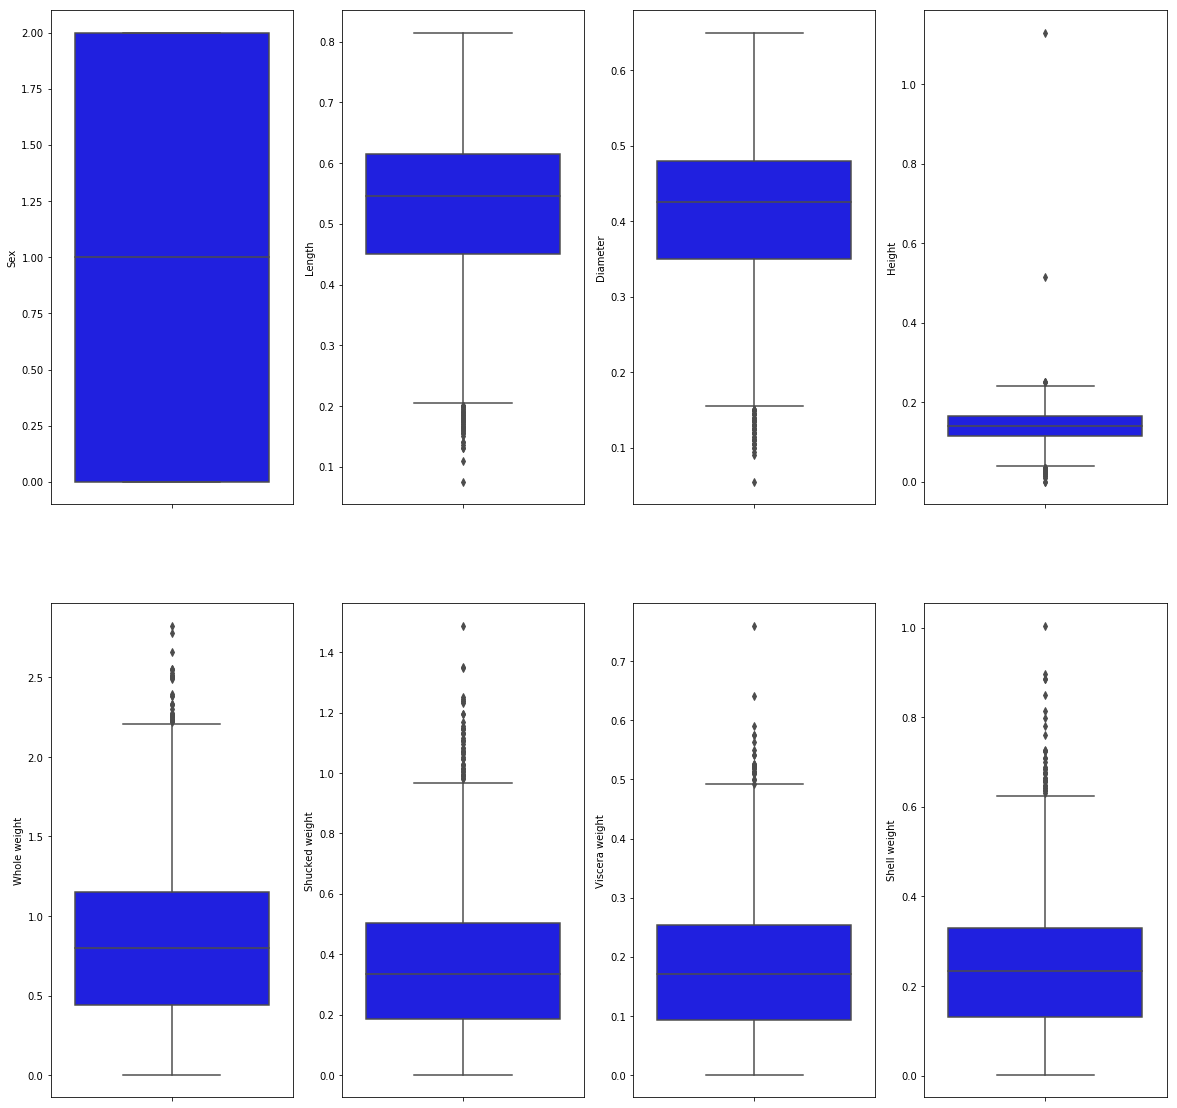

In [19]:
plotn=1
plt.figure(figsize=(20,20))
for col in data:
    if plotn<9:
        ax=plt.subplot(2,4,plotn)
        sns.boxplot(data[col],color='blue',orient='v')
    plotn+=1
plt.show()

from the above graph:

    Graph1:
    
        In this the Sex column that is categorical column its seems to be that there are no outliers.
        
    Graph2:
    
        In this the Length column i.e. continous column its seems that there are outliers.
        
    Graph3:
    
        In this the Diameter column its seems that there are outliers.
        
    Graph4:
    
        In this the Height column its seems that there are outliers.
        
    Graph5:
    
        In this the Whole weight column its seems that there are outliers.
        
    Graph6:
    
        In this column i.e. Shucked weight its seems that there are outliers.
        
    Graph7:
    
        In this column i.e. Viscera weight its seems that there are outliers.
        
    Graph8:
    
        In this column i.e. Shell weight its seems that there are outliers.

##### Multi-Colinearity

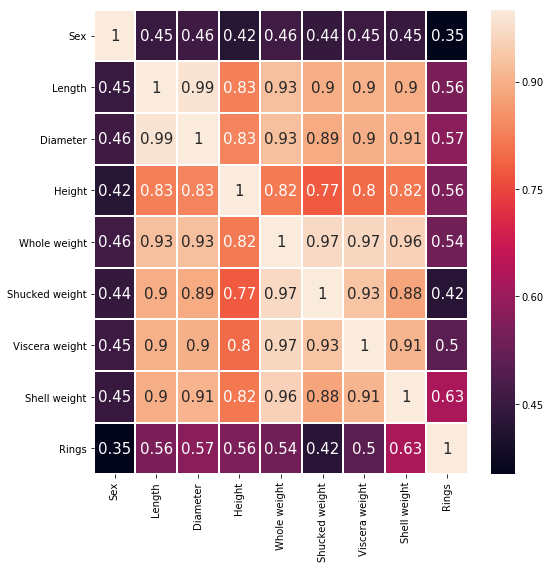

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

Form the above we can see that there is multicolinearity exists.

So, the length & Diameter column is 99% dependent to each other. the Length column is alsocontribute to predict the no. of rings in the 
shell that are 56% while diameter contribute 57%. 

So, I think there is no need of Length to predict the Rings.

The Whole weight is dependent to Shucked weight, Viscera weight i.e. 97% and 96% to Shell weight. and the Shell Weight is contributing 
63% to predict the Rings.

So, I think there is no need Whole weight & Shucked weight column too.

In [21]:
data.shape

(4177, 9)

As the data has 4177 no. of records & 9 columns before removing the outliers.

## Data Cleaning

In [22]:
data.drop(columns=['Length','Whole weight','Shucked weight'],axis=1,inplace=True)

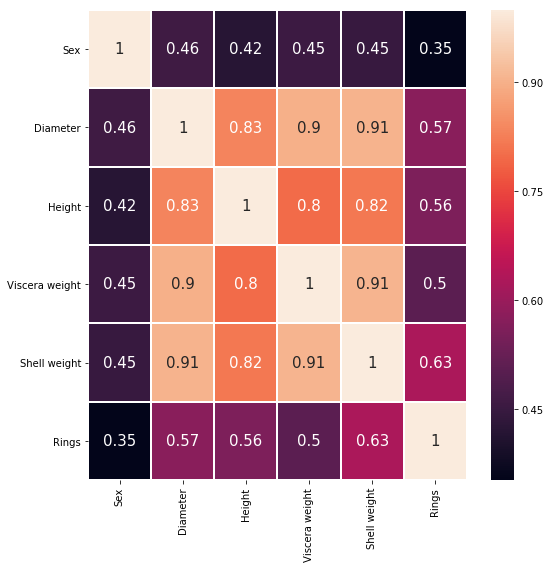

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

As we can see there is less multi-Colinearity.

### Removing Outliers

In [24]:
from scipy.stats import zscore
zscore=zscore(data[['Diameter','Height','Viscera weight','Shell weight']])
abs_Zscore=np.abs(zscore)
filtered=(abs_Zscore<2.5).all(axis=1)
data=data[filtered]

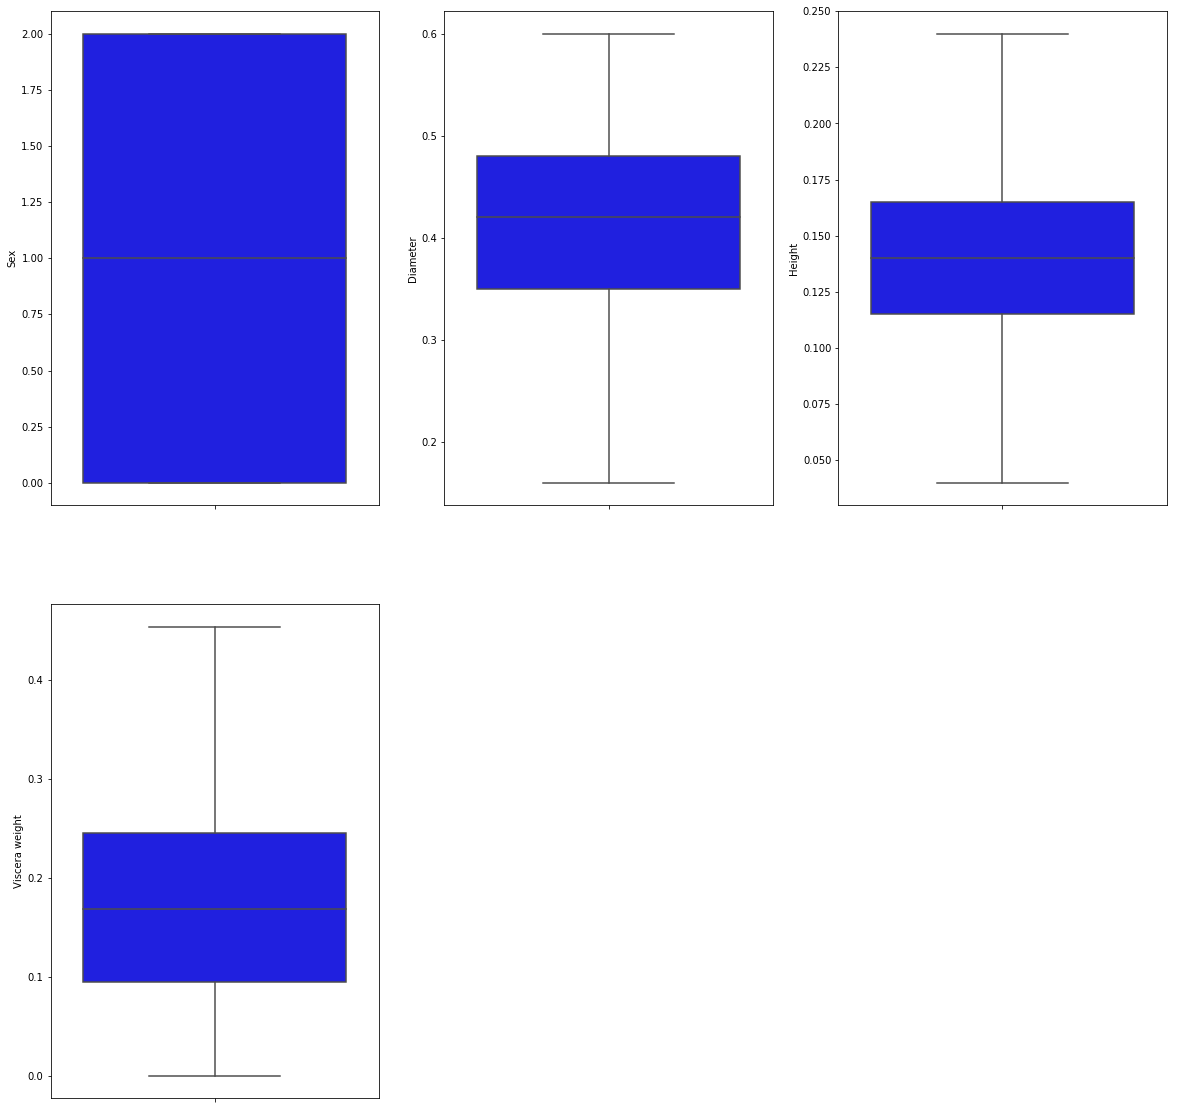

In [25]:
plotn=1
plt.figure(figsize=(20,20))
for col in data:
    if plotn<5:
        ax=plt.subplot(2,3,plotn)
        sns.boxplot(data[col],color='blue',orient='v')
    plotn+=1
plt.show()

Hence, there are no outliers.

#### Drop duplicates

In [26]:
data.drop_duplicates(inplace=True)

In [27]:
data.shape

(4006, 6)

###### After cleaning data we get 4006 records & 6 columns.

#### Data loss in %

In [28]:
per=(4177-4066)/4177
print("Loss of records in percentage is :"+str(per*100)+"%")

Loss of records in percentage is :2.6574096241321525%


 Here we loss 2.65% perentage of Records that are 111 no. of records

In [29]:
data.describe()

,Sex,Diameter,Height,Viscera weight,Shell weight,Rings
count,4006.000000,4006.000000,4006.000000,4006.000000,4006.000000,4006.000000
mean,0.955067,0.408316,0.139134,0.176591,0.233202,9.932351
std,0.827419,0.091370,0.035516,0.100086,0.124923,3.099139
min,0.000000,0.160000,0.040000,0.000500,0.013000,3.000000
25%,0.000000,0.350000,0.115000,0.095000,0.132000,8.000000
50%,1.000000,0.420000,0.140000,0.169000,0.230000,9.000000
75%,2.000000,0.480000,0.165000,0.246000,0.320000,11.000000
max,2.000000,0.600000,0.240000,0.454000,0.585500,29.000000


Here we analyze that in the continous variable all the records value is greater than 0.

###### Noraliziing the data

In [30]:
features=['Diameter','Height','Viscera weight','Shell weight']

In [31]:
from sklearn.preprocessing import PowerTransformer
scalar=PowerTransformer(method='box-cox')
data[features]=scalar.fit_transform(data[features].values)
data[features].head()

,Diameter,Height,Viscera weight,Shell weight
0,-0.572744,-1.237619,-0.670549,-0.580147
1,-1.496724,-1.369758,-1.402385,-1.401620
2,0.037458,-0.140304,-0.216531,-0.072047
3,-0.572744,-0.420768,-0.517474,-0.535217
4,-1.575572,-1.630143,-1.557979,-1.589712


In [32]:
data.head()

,Sex,Diameter,Height,Viscera weight,Shell weight,Rings
0,0,-0.572744,-1.237619,-0.670549,-0.580147,15
1,0,-1.496724,-1.369758,-1.402385,-1.401620,7
2,1,0.037458,-0.140304,-0.216531,-0.072047,9
3,0,-0.572744,-0.420768,-0.517474,-0.535217,10
4,2,-1.575572,-1.630143,-1.557979,-1.589712,7


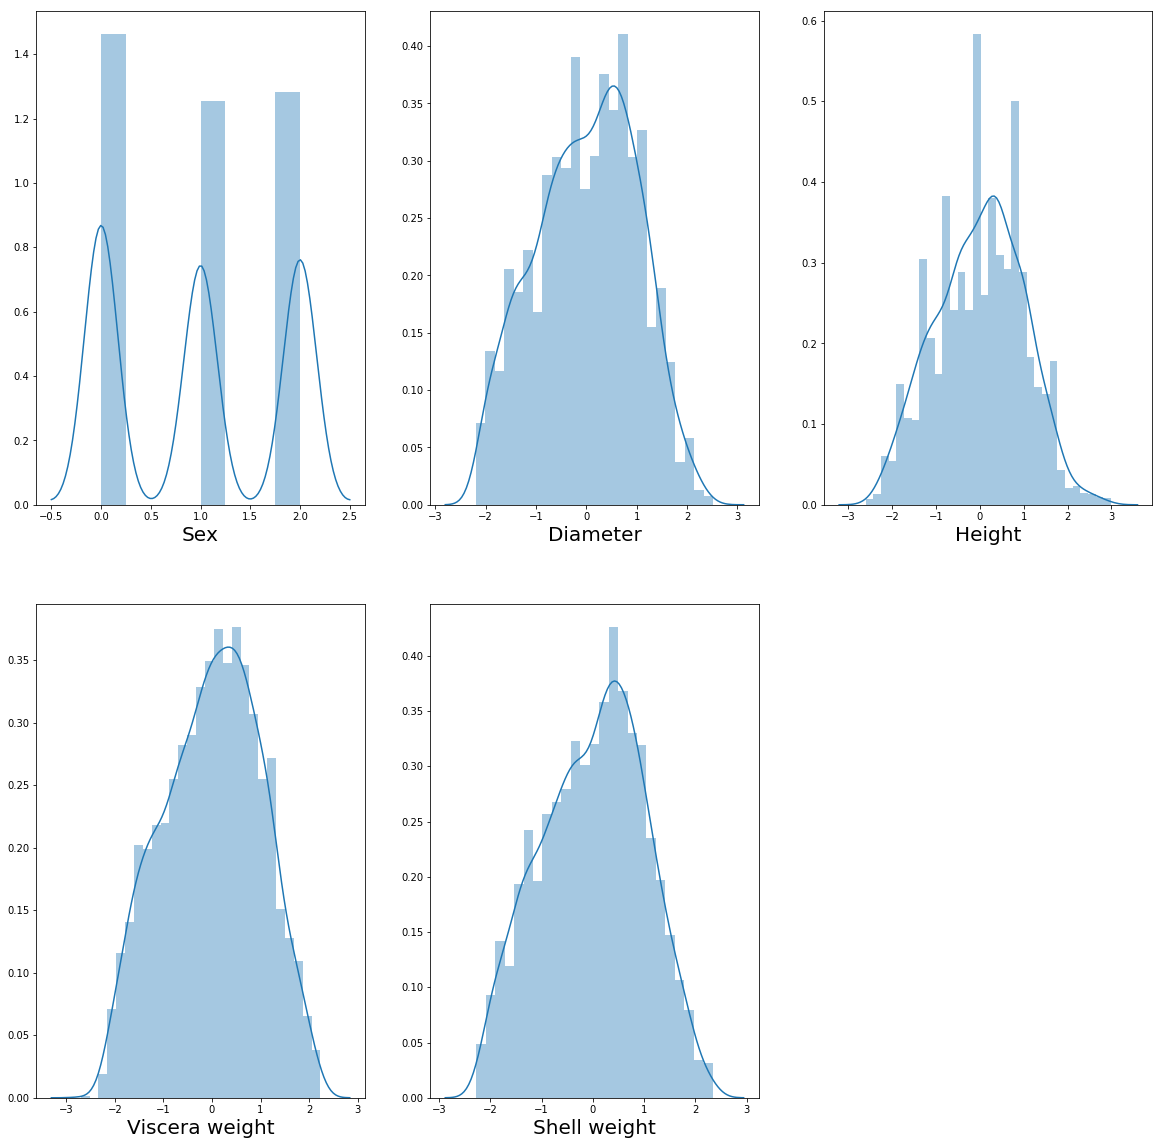

In [33]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=5:
        ax=plt.subplot(2,3,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

As using Box-cox technique its helps our data to be more symmetric.

In [34]:
data.skew()

Sex               0.083775
Diameter         -0.137280
Height           -0.064154
Viscera weight   -0.122240
Shell weight     -0.126361
Rings             1.217440
dtype: float64

Here we can see that all the features that are 'Sex',"Diameter","Height","Viscera weight","Shell weight" are in range betwenn -0.5 to 0.5.
so we can conclude that data. symmetric.

As there is no duplicates, no outliers, Normalized data, No multicolinearity. Hence the data is ready for model deployment.

## Model Deployment

In [35]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [36]:
X.head()

,Sex,Diameter,Height,Viscera weight,Shell weight
0,0,-0.572744,-1.237619,-0.670549,-0.580147
1,0,-1.496724,-1.369758,-1.402385,-1.401620
2,1,0.037458,-0.140304,-0.216531,-0.072047
3,0,-0.572744,-0.420768,-0.517474,-0.535217
4,2,-1.575572,-1.630143,-1.557979,-1.589712


In [37]:
Y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

Here we split our data into Features & Labels. X is our Features & Y Is the target.

In [38]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_=scalar.fit_transform(X)

In [39]:
X_

array([[-1.15441703, -0.5727442 , -1.23761911, -0.6705491 , -0.58014687],
       [-1.15441703, -1.49672417, -1.36975809, -1.40238484, -1.40161975],
       [ 0.05431131,  0.03745759, -0.14030409, -0.21653118, -0.07204737],
       ...,
       [-1.15441703,  0.71779897,  1.91511034,  1.07700316,  0.65323868],
       [ 0.05431131,  0.84891566,  0.28718159,  0.868264  ,  0.56961864],
       [-1.15441703,  1.82963621,  1.61271542,  1.72389666,  1.83075799]])

Here we normalized the features.

In [40]:
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.20,random_state=3521)

In [41]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor

from sklearn.svm import SVR

import xgboost as xgb


lr=LinearRegression()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
br=BaggingRegressor()
svm=SVR()
xgb_=xgb.XGBRegressor()

In [42]:
lr.fit(X_train,Y_train)
rf.fit(X_train,Y_train)
ada.fit(X_train,Y_train)
br.fit(X_train,Y_train)
svm.fit(X_train,Y_train)
xgb_.fit(X_train,Y_train)
print("All models are fitted!!")

All models are fitted!!


In [43]:
LR=lr.score(X_test,Y_test)
RF=rf.score(X_test,Y_test)
ADA=ada.score(X_test,Y_test)
BR=br.score(X_test,Y_test)
SVM=svm.score(X_test,Y_test)
XGB_=xgb_.score(X_test,Y_test)
print("Linear Regression model Score:",LR)
print("RandomForestRegressor  model Score:",RF)
print("AdaBoostRegressor  model Score:",ADA)
print("BaggingRegressor  model Score:",BR)
print("SVM  model Score:",SVM)
print("XGBoost Regression model Score:",XGB_)

Linear Regression model Score: 0.4299724249534945
RandomForestRegressor  model Score: 0.42357463988306077
AdaBoostRegressor  model Score: 0.23524223966931934
BaggingRegressor  model Score: 0.3881290247454965
SVM  model Score: 0.43622099564445105
XGBoost Regression model Score: 0.33796267162510896


In [44]:
cv=LeaveOneOut()
acc_lr=cross_val_score(lr, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
acc_rf=cross_val_score(rf, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
acc_ada=cross_val_score(ada, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
acc_br=cross_val_score(br, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
acc_svm=cross_val_score(svm, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
acc_xgb=cross_val_score(xgb_, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("Accuracy of each model:\n\tLinear Regression:",acc_lr)
print("\n\tRandomForest Regressor :",acc_rf)
print("\n\tAdaBoost Regressor :",acc_ada)
print("\n\tBagging Regressor :",acc_br)
print("\n\tSVM Regressor :",acc_svm)
print("\n\tXGB Regressor :",acc_xgb)

Accuracy of each model:
	Linear Regression: [-6.0657605  -1.06157779 -0.77657146 ... -2.53182874 -0.1046746
 -1.29663463]

	RandomForest Regressor : [-6.33 -0.91 -0.85 ... -3.4  -0.9  -0.69]

	AdaBoost Regressor : [-4.86369427 -2.01287554 -3.49965588 ... -3.67560322 -2.17941454
 -2.17048711]

	Bagging Regressor : [-6.8 -0.1 -0.5 ... -4.  -0.  -1. ]

	SVM Regressor : [-6.13194634 -1.12966254 -0.82080775 ... -2.0515362  -0.46355582
 -0.32792608]

	XGB Regressor : [-6.80218697 -0.74048376 -2.0015974  ... -3.71061707 -0.08267689
 -0.02532196]


## here the mean of mean_aboslute_error is

In [51]:
print("For Linear Regression:",acc_lr.mean())

For Linear Regression: -1.6804785372414712


In [52]:
print("For AdaBosst Regressor:",acc_ada.mean())

For AdaBosst Regressor: -2.444026607297221


In [53]:
print("For Random Forest:",acc_rf.mean())

For Random Forest: -1.6690364453320021


In [54]:
print("For Bagging Regressor:",acc_br.mean())

For Bagging Regressor: -1.7389915127309037


In [55]:
print("For XGB Regressor:",acc_xgb.mean())

For XGB Regressor: -1.7094095518037908


In [56]:
print("For SVM Regressor:",acc_svm.mean())

For SVM Regressor: -1.5687002497700189


from above expression we conclude that SVM model is the best to use for the data to predict the Rings.

In [57]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(X_)

array([[-1.12684965e+00,  1.54842941e+00, -5.27139881e-01,
         1.70871214e-01,  6.42258131e-02],
       [-2.38274999e+00,  1.92323317e+00,  5.40159371e-02,
         1.29572647e-02,  3.01887926e-02],
       [-2.02478236e-01, -2.05498881e-04, -5.54922499e-02,
         1.50109560e-01, -9.74928390e-02],
       ...,
       [ 2.41051443e+00,  4.75572826e-01,  9.17920803e-01,
        -4.30330857e-01, -1.94179533e-01],
       [ 1.22058498e+00, -4.19362562e-01, -4.44217750e-01,
        -1.27632882e-01, -7.15287035e-02],
       [ 3.68437186e+00,  9.63370319e-02, -1.08965087e-01,
         9.39993686e-02, -2.61151049e-03]])

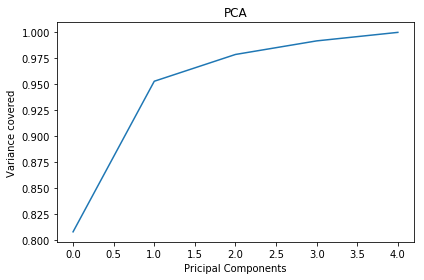

In [58]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Pricipal Components")
plt.ylabel("Variance covered")
plt.title("PCA")
plt.tight_layout()

In [59]:
new_pca=PCA(n_components=2)
new_pcom=new_pca.fit_transform(X_)
pcomp=pd.DataFrame(new_pcom,columns="PCA1 PCA2".split(" "))
pcomp


,PCA1,PCA2
0,-1.126850,1.548429
1,-2.382750,1.923233
2,-0.202478,-0.000205
3,-0.648195,1.399959
4,-3.405200,-0.293049
5,-2.406494,-0.587181
6,0.393900,-0.178376
7,-0.080593,-0.031336
8,-0.588502,1.381154
9,0.551364,-0.229102


In [60]:
svm.fit(X_train,Y_train)

SVR()

In [61]:
svm.score(X_test,Y_test)

0.43622099564445105

In [62]:
pred=np.round(svm.predict(X_test))
pred

array([ 9.,  9.,  7., 10.,  9.,  9., 10., 10.,  7.,  9., 12., 10., 11.,
        5., 11., 12., 10.,  7., 11., 11., 10., 12., 11., 11., 12., 11.,
       11., 10., 10., 11.,  8.,  6.,  9.,  8., 10., 10.,  8.,  9.,  7.,
        9., 11., 11., 10., 10.,  8., 10.,  9., 11., 10.,  9.,  7., 10.,
        9., 12.,  9.,  5.,  9., 10.,  9., 14., 10., 10., 11., 10.,  8.,
       10.,  8., 10.,  7., 11.,  9.,  8.,  9., 10.,  9., 11., 11.,  7.,
        9., 10., 10.,  9., 10., 10., 11.,  8., 10.,  5., 10., 11., 11.,
       10.,  7.,  9.,  9.,  7., 10.,  7.,  8.,  8., 10.,  9., 13.,  7.,
        9., 11.,  9.,  8., 10.,  7., 10., 10.,  9., 10.,  7., 10.,  8.,
       11.,  7., 11., 12.,  6., 13., 13., 11., 10.,  7., 10., 10., 12.,
        7.,  8., 10.,  5., 10.,  8.,  9.,  5.,  8.,  5., 11., 10., 10.,
       12., 12.,  7.,  9., 13., 10.,  7.,  8.,  9.,  9., 10.,  8.,  8.,
       10., 11., 10.,  7., 11., 11., 11., 10., 12.,  8.,  8., 13.,  7.,
        6.,  6., 10., 10.,  5.,  9.,  8., 11.,  8., 10., 11.,  8

##### Visualizing grapf for predicted values & Actual values

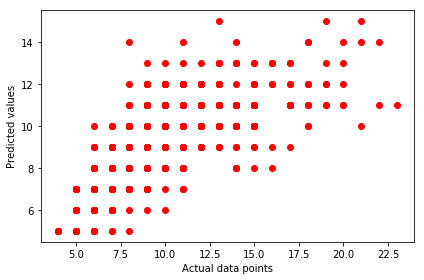

In [63]:
plt.scatter(Y_test,pred,color='R')
plt.xlabel("Actual data points")
plt.ylabel("Predicted values")
plt.tight_layout()

#### Model Evaluation

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(pred,Y_test)
mae=mean_absolute_error(pred,Y_test)
rmse=np.sqrt(mean_squared_error(pred,Y_test))

print("-"*30,"\n Mean Absolute error: ",mae)
print("\n Mean Squared Error:",mse)
print("\n Root mean Squared Error:",rmse)
print("\n R2 Score of the model:",r2_score(Y_test,pred))

------------------------------ 
 Mean Absolute error:  1.571072319201995

 Mean Squared Error: 5.493765586034913

 Root mean Squared Error: 2.3438783215079475

 R2 Score of the model: 0.425320174420004


from the above expression we can there is so much error in our model while prediction. so, we will check that our model is underfitted/overfitted or not.

In [65]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

#L1 Form
lasso=LassoCV(alphas=[0.01,0.02,0.03,0.05,0.06],max_iter=1000,normalize=False)
lasso.fit(X_train,Y_train)

lasso_reg=Lasso(lasso.alpha_)
lasso_reg.fit(X_train,Y_train)


lasso_reg.score(X_test,Y_test)

0.4316705259497977

In [66]:
ridge=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=False)
ridge.fit(X_train,Y_train)
ridge_reg=Ridge(alpha=ridge.alpha_)
ridge_reg.fit(X_train,Y_train)
ridge_reg.score(X_test,Y_test)

0.42998163485822916

As we can see the score we get from L1 & L2 form is less than the model score. So, our model is not underfitted/overfitted.

### Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":[0.001,2,3,4,5,6,7,10],"gamma":[0.1,0.2,0.3,0.4,0.5,0.6,1]}

In [68]:
grid=GridSearchCV(svm,param_grid)

In [69]:
grid.fit(X_train,Y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 2, 3, 4, 5, 6, 7, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1]})

In [70]:
grid.best_estimator_

SVR(C=7, gamma=0.3)

In [71]:
svm=SVR(C=7,gamma=0.3)
svm.fit(X_train,Y_train)


SVR(C=7, gamma=0.3)

In [72]:
pred=np.round(svm.predict(X_test))
pred

array([ 9.,  9.,  7., 10.,  9.,  9., 10., 10.,  7.,  9., 13., 10., 11.,
        5., 11., 13., 10.,  8., 11., 11., 11., 13., 11., 11., 14., 10.,
       11., 10., 10., 11.,  9.,  6.,  9.,  8., 11., 10.,  8.,  9.,  7.,
        9., 10., 11.,  9., 10.,  8., 10.,  9., 11., 10., 10.,  7., 10.,
        9., 14.,  9.,  5.,  9., 10.,  9., 15., 10., 10., 11., 10.,  8.,
       10.,  9., 10.,  7., 11.,  9.,  9., 10., 10.,  9., 11., 11.,  6.,
        8., 10., 10.,  9., 10., 10., 11.,  8., 10.,  5.,  9., 11., 11.,
       10.,  7.,  9.,  9.,  7., 10.,  7.,  8.,  7., 10.,  9., 13.,  7.,
        9., 12.,  9.,  8., 10.,  7., 10., 10.,  9., 10.,  7., 10.,  8.,
       11.,  7., 11., 13.,  6., 14., 13., 11., 10.,  7., 10., 10., 13.,
        7.,  9., 10.,  5., 10.,  9.,  9.,  5.,  8.,  5., 11., 10., 10.,
       12., 12.,  7.,  9., 14., 10.,  6.,  9.,  9.,  9., 10.,  8.,  8.,
       10., 11., 10.,  7., 12., 11., 10., 10., 12.,  8.,  8., 14.,  7.,
        6.,  6., 10., 10.,  5.,  9.,  8., 11.,  9., 10., 12.,  8

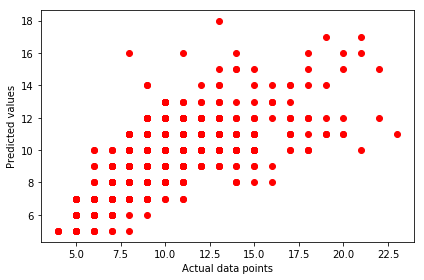

In [73]:
plt.scatter(Y_test,pred,color='R')
plt.xlabel("Actual data points")
plt.ylabel("Predicted values")
plt.tight_layout()

In [74]:
svm.score(X_test,Y_test)

0.44728955440808804

In [75]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(pred,Y_test)
mae=mean_absolute_error(pred,Y_test)
rmse=np.sqrt(mean_squared_error(pred,Y_test))

print("-"*30,"\n Mean Absolute error: ",mae)
print("\n Mean Squared Error:",mse)
print("\n Root mean Squared Error:",rmse)
print("\n R2 Score of the model:",r2_score(Y_test,pred))

------------------------------ 
 Mean Absolute error:  1.5723192019950125

 Mean Squared Error: 5.375311720698255

 Root mean Squared Error: 2.318471850313964

 R2 Score of the model: 0.43771113752261404


In [76]:
import pickle
pickle.dump(svm,open("Practice3_model.pickle","wb"))